In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, t
import scipy.stats as stats
import seaborn as sns
plt.style.use('bmh')

In [2]:
x1 = np.linspace(-2, np.log(20000), 100)
y1 = uniform.pdf(x1, loc=0, scale=np.log(1000))

In [3]:
os.getcwd()

'/home/deeznuts/Documents/Univ/M2_S2/Bayesian Statistics'

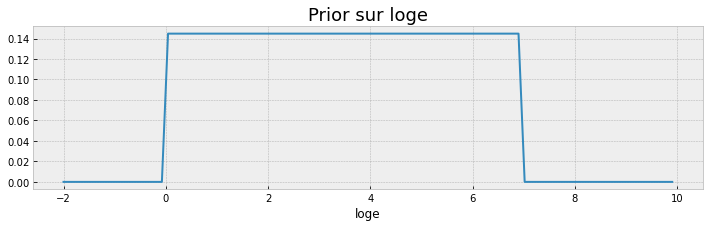

In [4]:
_, ax = plt.subplots(figsize=(12, 3))
plt.plot(x1, y1)
plt.title("Prior sur loge", fontsize=18)
plt.xlabel("loge")
plt.show()
#_.savefig('prior_e.png', bbox_inches = 'tight')

In [5]:
x2 = np.linspace(-20, 20, 100)
y2 = t.pdf(x2, loc=0, scale=2, df=2)

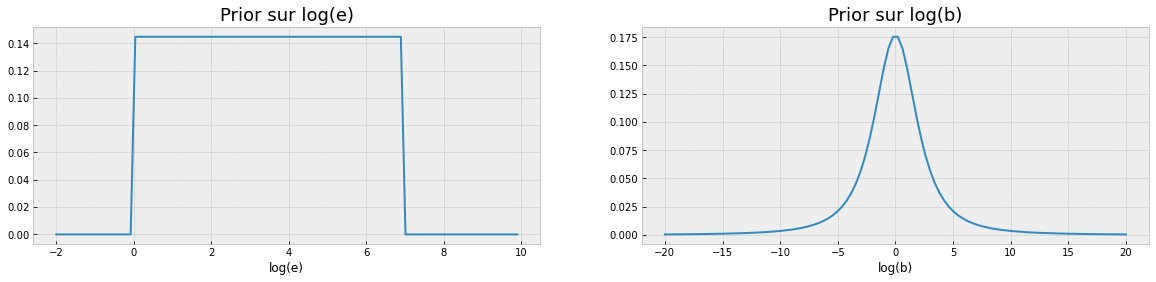

In [6]:
_, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)
ax[1].plot(x2, y2)
ax[1].set_title("Prior sur log(b)", fontsize=18)
ax[1].set_xlabel("log(b)")
########################
ax[0].plot(x1, y1)
ax[0].set_title("Prior sur log(e)", fontsize=18)
ax[0].set_xlabel("log(e)")
plt.show()
#_.savefig('priors.png', bbox_inches = 'tight')

In [7]:
df = pd.read_csv('mayflies_salt_survival.csv')

In [8]:
df_Nacl = df[df.Salt.values=="NaCl"]
N0_NaCl = df_Nacl.N0.values
Ns_NaCl = df_Nacl.Nsurv.values

In [9]:
df_CaCl2 = df[df.Salt.values=="CaCl2"]
N0_CaCl2 = df_CaCl2.N0.values
Ns_CaCl2 = df_CaCl2.Nsurv.values

In [10]:
df_Comm = df[df.Salt.values=="Commercial Salt"]
N0_Comm = df_Comm.N0.values
Ns_Comm = df_Comm.Nsurv.values

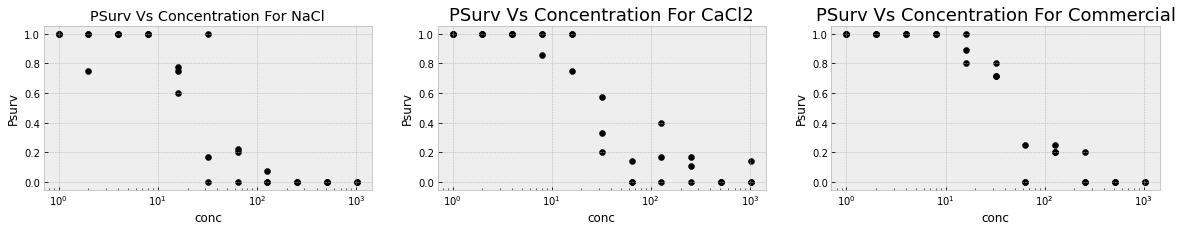

In [11]:
_, ax = plt.subplots(figsize=(20, 3), nrows=1, ncols=3)
ax[0].scatter(df_Nacl.conc.values, Ns_NaCl/N0_NaCl, color='black')
ax[0].set_title("PSurv Vs Concentration For NaCl")
ax[0].set_xlabel("conc")
ax[0].set_ylabel("Psurv")
ax[0].set_xscale("log")
####################################
ax[1].scatter(df_CaCl2.conc.values, Ns_CaCl2/N0_CaCl2, color='black')
ax[1].set_title("PSurv Vs Concentration For CaCl2", fontsize=18)
ax[1].set_xlabel("conc")
ax[1].set_ylabel("Psurv")
ax[1].set_xscale("log")
#########################################
ax[2].scatter(df_Comm.conc.values, Ns_Comm/N0_Comm, color='black')
ax[2].set_title("PSurv Vs Concentration For Commercial", fontsize=18)
ax[2].set_xlabel("conc")
ax[2].set_ylabel("Psurv")
ax[2].set_xscale("log")
plt.show()
#_.savefig('data_surv.png', bbox_inches = 'tight')

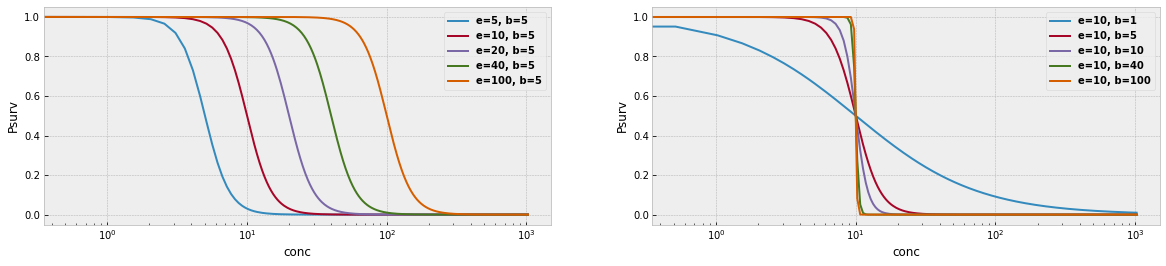

In [12]:
xs = np.linspace(0, 1024, 2000)
f = lambda c, e, b: 1/(1+(c/e)**b)
le = [5, 10, 20, 40,  100]
lb = [1, 5, 10, 40, 100] 

_, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)
for elem in le:
    ax[0].plot(xs, f(c=xs, e=elem, b=lb[1]), label=f"e={elem}, b={lb[1]}")
    ax[0].legend(loc = 1, prop = {'weight':'bold', 'size': 10})
    ax[0].set_xlabel("conc")
    ax[0].set_ylabel("Psurv")
    ax[0].set_xscale("log")
for elem in lb:
    ax[1].plot(xs, f(c=xs, b=elem, e=le[1]), label=f"e={le[1]}, b={elem}")
    ax[1].legend(loc = 1, prop = {'weight':'bold', 'size': 10})
    ax[1].set_xlabel("conc")
    ax[1].set_ylabel("Psurv")
    ax[1].set_xscale("log")
#_.savefig('P_surv.png', bbox_inches = 'tight')

In [13]:
esim1 = 20.4;bsim1 = 2.01;
esim2 = 8.78; bsim2 = 4.47;
esim3 = 45.3; bsim3 = 1.44;
esim4 = 70.24; bsim4 = 3.5;

In [14]:
fakepost1 = pd.read_csv("postfake1.csv")
fakepost2 = pd.read_csv("postfake2.csv")
fakepost3 = pd.read_csv("postfake3.csv")
fakepost4 = pd.read_csv("postfake4.csv")
efake1 = fakepost1.e; bfake1 = fakepost1.b;
efake2 = fakepost2.e; bfake2 = fakepost2.b;
efake3 = fakepost3.e; bfake3 = fakepost3.b;
efake4 = fakepost4.e; bfake4 = fakepost4.b;

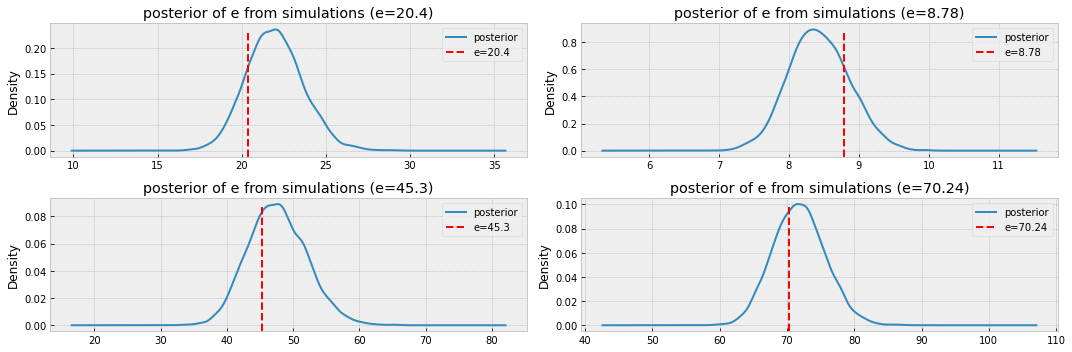

In [15]:
efakes = [efake1, efake2, efake3, efake4]
bfakes = [bfake1, bfake2, bfake3, bfake4]
esims = [esim1, esim2, esim3, esim4]
bsims = [bsim1, bsim2, bsim3, bsim4]
titles_e = 4*["posterior of e from simulations (e="]
titles_b = 4*["posterior of b from simulations (b="]
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
for item in zip(axes.ravel(), efakes, esims, titles_e):
    ax, efak, e, ttle = item
    efak.plot.kde(ax=ax, label="posterior")
    ax.axvline(x=e, ls='--', color='r', ymax=.95, label=f"e={e}")
    ax.set_title(ttle+f"{e})")
    ax.legend()
    plt.tight_layout()
#_.savefig("fakedata_e.png", bbox_inches = 'tight')

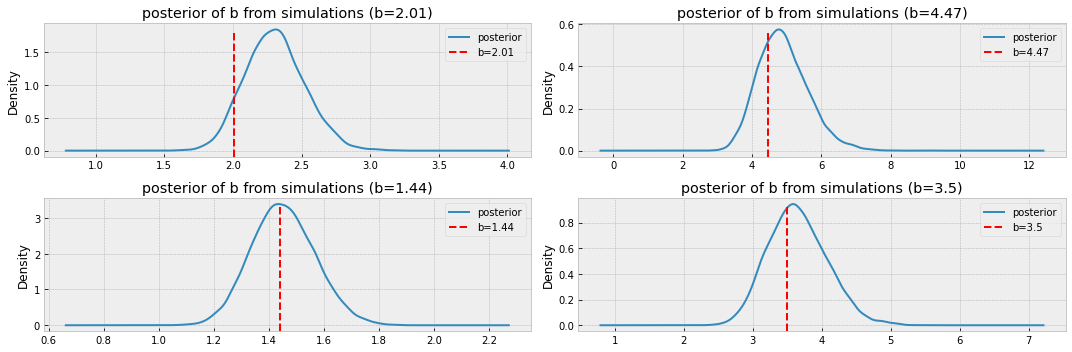

In [16]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
for item in zip(axes.ravel(), bfakes, bsims, titles_b):
    ax, bfak, b, ttle = item
    bfak.plot.kde(ax=ax, label="posterior")
    ax.axvline(x=b, ls='--', color='r', ymax=.95, label=f"b={b}")
    ax.set_title(ttle+f"{b})")
    ax.legend()
    plt.tight_layout()
#_.savefig("fakedata_b.png", bbox_inches = 'tight')

In [17]:
# _, ax = plt.subplots(figsize=(12, 4))
# plt.scatter(df_CaCl2.conc.values, Ns_CaCl2/N0_CaCl2, color='black')
# plt.title("Proportion of Survilval Vs Concentration For CaCl2", fontsize=18)
# plt.xlabel("conc")
# plt.ylabel("Psurv")
# plt.xscale("log")
# plt.show()
# #_.savefig('prior_b.png', bbox_inches = 'tight')

In [18]:
# _, ax = plt.subplots(figsize=(12, 4))
# plt.scatter(df_Comm.conc.values, Ns_Comm/N0_Comm, color='black')
# plt.title("Proportion of Survilval Vs Concentration For Commercial", fontsize=18)
# plt.xlabel("conc")
# plt.ylabel("Psurv")
# plt.xscale("log")
# plt.show()
# #_.savefig('prior_b.png', bbox_inches = 'tight')

In [19]:
p = 200
n = 20
conc = np.linspace(1, 2048, p)
Mat = np.zeros((n, p))

In [20]:
for i in range(n):
    b = np.exp(4*np.random.standard_t(df=2))
    e = np.exp(np.random.uniform(low = np.log(1), high = np.log(1000)))
    Mat[i, :] = 1/(1+(conc/e)**b)

/tmp/ipykernel_234147/2015870411.py:4: RuntimeWarning: overflow encountered in power
  Mat[i, :] = 1/(1+(conc/e)**b)


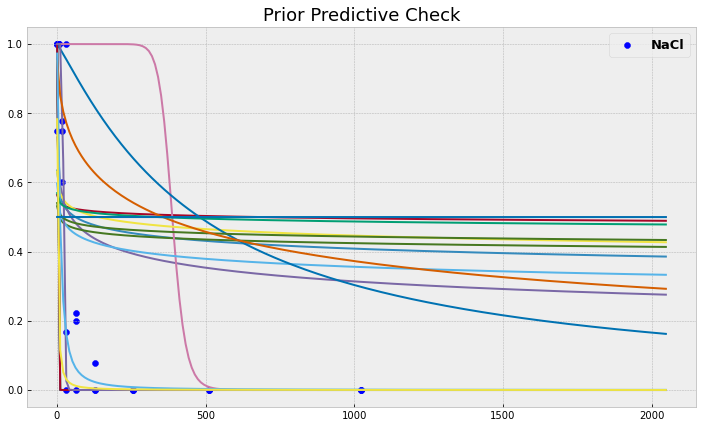

In [21]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
plt.plot(conc, Mat.T)
plt.scatter(df_Nacl.conc.values, Ns_NaCl/N0_NaCl, c='blue', label = 'NaCl')
plt.legend(prop = {'weight':'bold', 'size': 13})
plt.title("Prior Predictive Check", fontsize=18)
plt.show()
#_.savefig('prior_pred_check_NaCl.png', bbox_inches = 'tight')

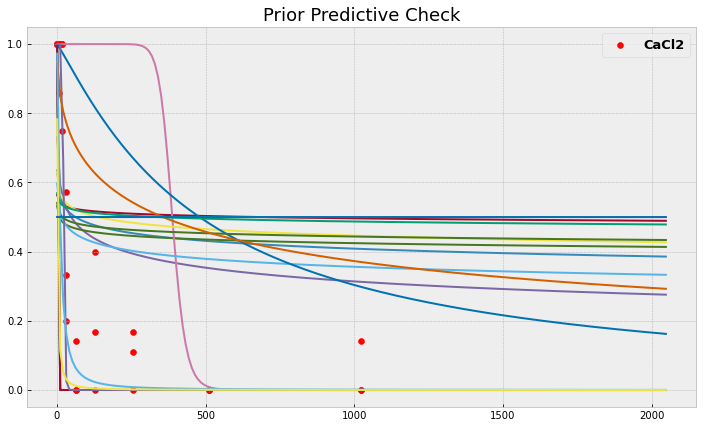

In [22]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
plt.plot(conc, Mat.T)
plt.scatter(df_CaCl2.conc.values, Ns_CaCl2/N0_CaCl2, c='red', label = 'CaCl2')
plt.legend(prop = {'weight':'bold', 'size': 13})
plt.title("Prior Predictive Check", fontsize=18)
plt.show()
#_.savefig('prior_pred_check_CaCl2.png', bbox_inches = 'tight')

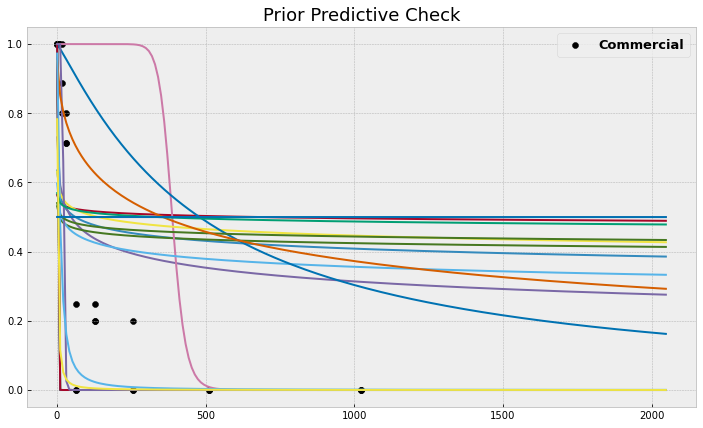

In [23]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
plt.plot(conc, Mat.T)
plt.scatter(df_CaCl2.conc.values, Ns_Comm/N0_Comm, c='black', label = 'Commercial')
plt.legend(prop = {'weight':'bold', 'size': 13})
plt.title("Prior Predictive Check", fontsize=18)
plt.show()
#_.savefig('prior_pred_check_Comme.png', bbox_inches = 'tight')

In [25]:
posterior = pd.read_csv("posterior.csv")
posterior.rename(
    columns={"e[1]": "e_nacl", "e[2]": "e_cacl2", "e[3]": "e_comme", 
             "b[1]": "b_nacl", 'b[2]': "b_cacl2", "b[3]": "b_comme"},
    inplace=True,
)

posterior

,Unnamed: 0,log_e[1],log_e[2],log_e[3],log_b[1],log_b[2],log_b[3],e_nacl,e_cacl2,e_comme,b_nacl,b_cacl2,b_comme,lp__
0,1,3.245266,3.653038,3.935513,0.602020,0.398628,0.827439,25.668538,38.591737,51.188421,1.825803,1.489780,2.287452,-136.667674
1,2,3.370114,3.422662,3.600461,0.847629,0.600773,0.688560,29.081836,30.650911,36.615112,2.334107,1.823527,1.990846,-136.458723
2,3,3.045539,3.586480,3.858092,0.671230,0.296706,0.854811,21.021348,36.106745,47.374854,1.956642,1.345420,2.350930,-137.900863
3,4,2.941813,3.196063,3.880716,0.647688,0.337632,0.951127,18.950174,24.436144,48.458917,1.911117,1.401624,2.588626,-141.781136
4,5,3.313152,3.622898,3.810577,0.708057,0.436194,0.564918,27.471567,37.445912,45.176479,2.030044,1.546809,1.759303,-135.704317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,3.278514,3.643246,3.789446,0.643459,0.479758,1.154849,26.536323,38.215679,44.231894,1.903053,1.615683,3.173543,-138.550316
3996,3997,2.985044,3.767665,3.702835,0.853973,0.359623,0.505207,19.787367,43.278909,40.562147,2.348960,1.432789,1.657328,-140.891411
3997,3998,3.638311,3.379346,3.741712,0.569099,0.562153,0.874465,38.027550,29.351563,42.170143,1.766675,1.754446,2.397592,-139.122949
3998,3999,3.326425,3.482854,3.911236,0.519040,0.222010,0.507667,27.838629,32.552500,49.960642,1.680413,1.248584,1.661411,-139.342930


In [26]:
p = 3000
n = 1000
conc = np.linspace(1, 2048, p)
e_nacl = posterior.e_nacl.values[:n]
b_nacl = posterior.b_nacl.values[:n]
Mat_nacl = np.zeros((n, p))
for i in range(n):
    Mat_nacl[i, :] = 1/(1+(conc/e_nacl[i])**b_nacl[i])

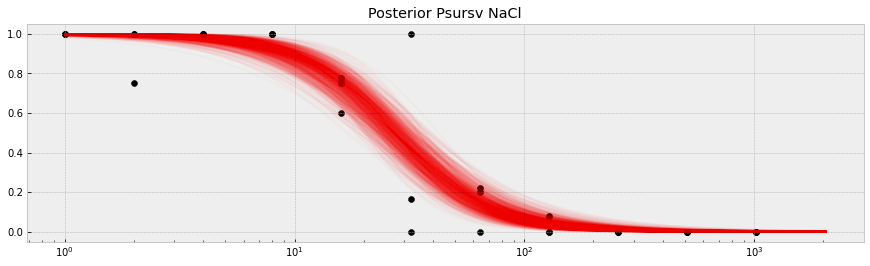

In [27]:
_, ax = plt.subplots(figsize=(15, 4))
plt.plot(conc, Mat_nacl.T, color="red", alpha=0.02)
plt.scatter(df_Nacl.conc.values, Ns_NaCl/N0_NaCl, c='black', label = 'NaCl')
plt.xscale("log")
plt.title("Posterior Psursv NaCl")
plt.show()
#_.savefig('poster_psurv_nacl.png', bbox_inches = 'tight')

In [28]:
p = 3000
n = 1000
conc = np.linspace(1, 2048, p)
e_cacl2 = posterior.e_cacl2.values[:n]
b_cacl2 = posterior.b_cacl2.values[:n]
Mat_cacl2 = np.zeros((n, p))
for i in range(n):
    Mat_cacl2[i, :] = 1/(1+(conc/e_cacl2[i])**b_cacl2[i])

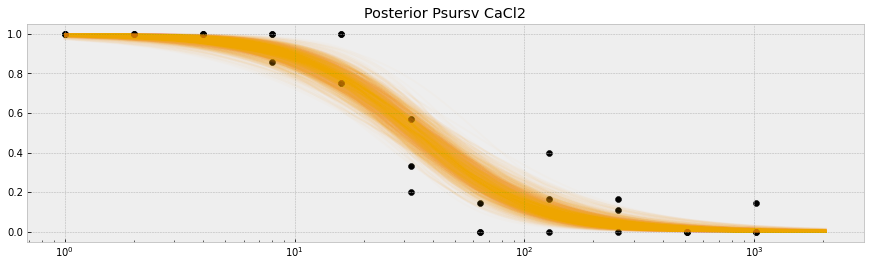

In [29]:
_, ax = plt.subplots(figsize=(15, 4))
plt.plot(conc, Mat_cacl2.T, color='orange', alpha=0.02)
plt.scatter(df_CaCl2.conc.values, Ns_CaCl2/N0_CaCl2, c='black', label = 'CaCl2')
plt.xscale("log")
plt.title("Posterior Psursv CaCl2")
plt.show()
#_.savefig('poster_psurv_cacl2.png', bbox_inches = 'tight')

In [30]:
p = 3000
n = 1000
conc = np.linspace(1, 2048, p)
e_comme = posterior.e_comme.values[:n]
b_comme = posterior.b_comme.values[:n]
Mat_comme = np.zeros((n, p))
for i in range(n):
    Mat_comme[i, :] = 1/(1+(conc/e_comme[i])**b_comme[i])

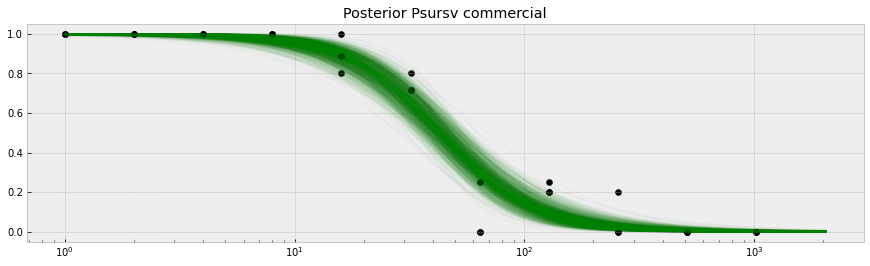

In [31]:
_, ax = plt.subplots(figsize=(15, 4))
plt.plot(conc, Mat_comme.T, color="green", alpha=0.02)
plt.scatter(df_CaCl2.conc.values, Ns_Comm/N0_Comm, c='black', label = 'Commercial')
plt.title("Posterior Psursv commercial")
plt.xscale("log")
plt.show()
#_.savefig('poster_psurv_comm.png', bbox_inches = 'tight')

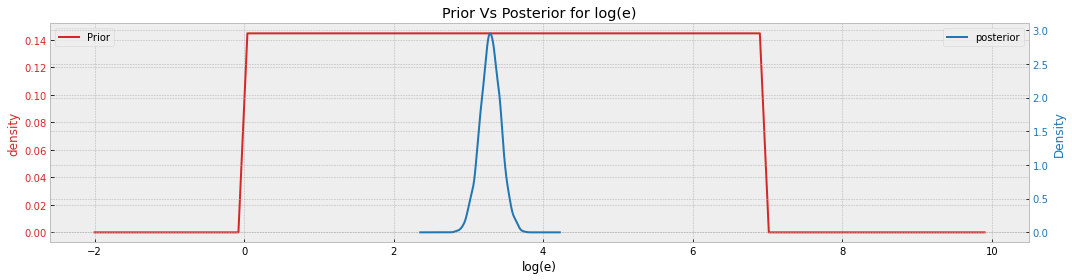

In [32]:
fig, ax1 = plt.subplots(figsize=(15, 4))

color = 'tab:red'
ax1.set_xlabel("log(e)")
ax1.set_ylabel('density', color=color)
ax1.plot(x1, y1, color=color, label='Prior')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('density', color=color)  # we already handled the x-label with ax1
np.log(posterior.e_nacl).plot.kde(color=color, label="posterior")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=1)
plt.title("Prior Vs Posterior for log(e)")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#fig.savefig('prior_post_loge.png', bbox_inches = 'tight')

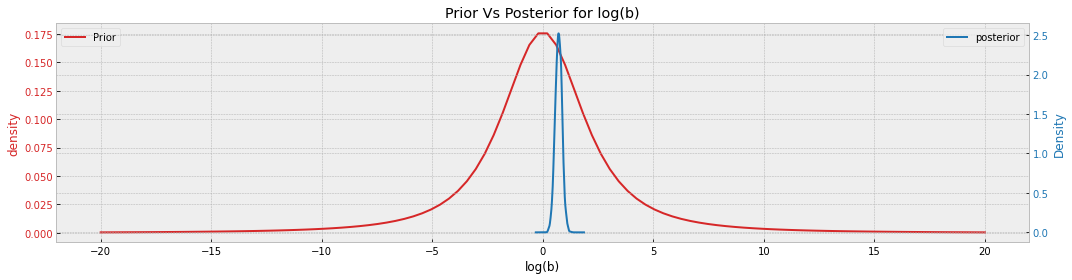

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 4))

color = 'tab:red'
ax1.set_xlabel("log(b)")
ax1.set_ylabel('density', color=color)
ax1.plot(x2, y2, color=color, label='Prior')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('density', color=color)  # we already handled the x-label with ax1
np.log(posterior.b_nacl).plot.kde(color=color, label="posterior")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=1)
plt.title("Prior Vs Posterior for log(b)")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#fig.savefig('prior_post_logb.png', bbox_inches = 'tight')

In [34]:
df.conc.values[df.Salt.values=="NaCl"]

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
          1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
          1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

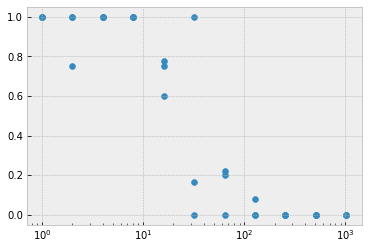

In [35]:
plt.scatter(df.conc.values[df.Salt.values=="NaCl"], Ns_NaCl/N0_NaCl)
plt.xscale("log")
plt.show()

### Fake Data Check?

/tmp/ipykernel_234147/2319630967.py:5: RuntimeWarning: overflow encountered in power
  PSurv = 1/(1+(concentration/e1)**b1)


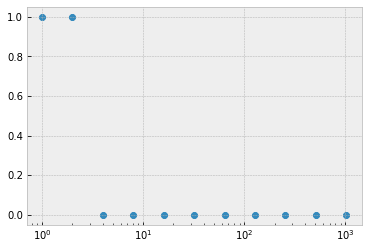

In [36]:
concentration = df.conc.values[:33]
for i in range(n):
    b1 = np.exp(2*np.random.standard_t(df=2))
    e1 = np.exp(np.random.uniform(low = np.log(1), high = np.log(1000)))
    PSurv = 1/(1+(concentration/e1)**b1)
Nsur_sim = np.random.binomial(N0_NaCl, PSurv)
plt.scatter(concentration, Nsur_sim/N0_NaCl)
plt.xscale("log")
plt.show()

In [37]:
concentration = df.conc.values[:33]
T = np.zeros(33, dtype=int)
for i in range(1000):
    b2 = np.random.choice(b_cacl2, size=1)
    e2 = np.random.choice(e_cacl2, size=1)
    PSurv2 = 1/(1+(concentration/e2)**b2)
    T+=np.random.binomial(N0_CaCl2, PSurv2)
# Nsur_sim2 = np.random.binomial(N0_NaCl, PSurv2)
# plt.scatter(concentration, Nsur_sim2/N0_NaCl)
# plt.xscale("log")
# plt.show()

### Computing Statistics

In [38]:
concentration

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
          1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
          1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [39]:
Ns_CaCl2

array([6, 4, 8, 6, 6, 1, 1, 2, 0, 0, 0, 6, 6, 8, 2, 6, 4, 0, 1, 1, 0, 0,
       3, 3, 5, 6, 7, 1, 0, 0, 1, 0, 1])

In [40]:
np.round(T/1000).astype(int)

array([6, 4, 8, 6, 6, 2, 2, 1, 0, 0, 0, 6, 6, 8, 2, 5, 4, 2, 1, 0, 0, 0,
       3, 3, 5, 5, 5, 3, 2, 1, 0, 0, 0])

In [41]:
np.exp(t.rvs(df=2, loc=0, scale=2, size=100)).max()

2999179079.8049808

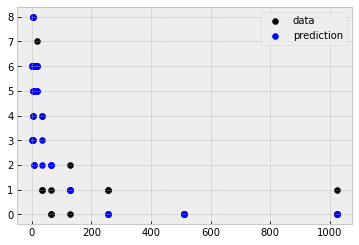

In [42]:
plt.scatter(concentration, Ns_CaCl2, color='black', label="data")
plt.scatter(concentration, np.round(T/1000).astype(int), color="blue", label="prediction")
plt.legend()
plt.show()

In [43]:
concentration.shape

(33,)

In [44]:
nsim = 10000
simmat_NaCl = np.zeros((nsim, concentration.shape[0]))
for i in range(nsim):
    b1 = np.random.choice(b_nacl, size=1)
    e1 = np.random.choice(e_nacl, size=1)
    PSurv1 = 1/(1+(concentration/e1)**b1)
    simmat_NaCl[i, :]=np.random.binomial(N0_NaCl, PSurv1)

In [45]:
T_mean_nacl = simmat_NaCl.mean(axis=1)

In [46]:
nsim = 10000
simmat_CaCl2 = np.zeros((nsim, concentration.shape[0]))
for i in range(nsim):
    b2 = np.random.choice(b_cacl2, size=1)
    e2 = np.random.choice(e_cacl2, size=1)
    PSurv2 = 1/(1+(concentration/e2)**b2)
    simmat_CaCl2[i, :]=np.random.binomial(N0_CaCl2, PSurv2)

In [47]:
T_mean_CaCl2 = simmat_CaCl2.mean(axis=1)

In [48]:
nsim = 10000
simmat_comm = np.zeros((nsim, concentration.shape[0]))
for i in range(nsim):
    b3 = np.random.choice(b_comme, size=1)
    e3 = np.random.choice(e_comme, size=1)
    PSurv3 = 1/(1+(concentration/e3)**b3)
    simmat_comm[i, :]=np.random.binomial(N0_Comm, PSurv3)

In [49]:
T_mean_comm = simmat_comm.mean(axis=1)

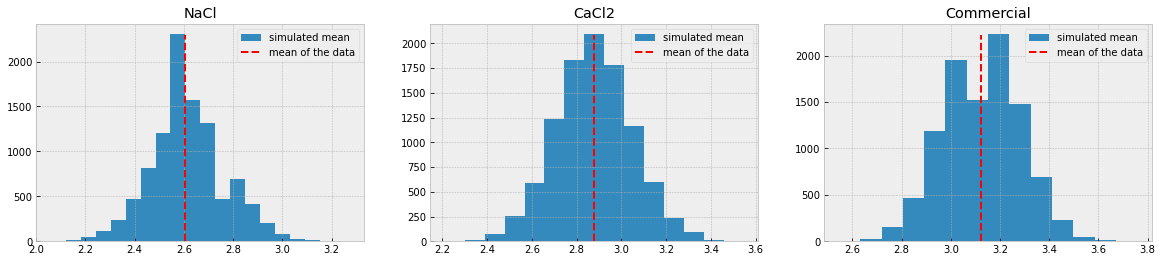

In [50]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(T_mean_nacl, bins=20, label = "simulated mean")
ax[0].axvline(x=Ns_NaCl.mean(), ls='--', color='r', ymax=.95, label="mean of the data")
ax[0].legend()
ax[0].set_title("NaCl")
#############################################
ax[1].hist(T_mean_CaCl2, bins=15, label = "simulated mean")
ax[1].axvline(x=Ns_CaCl2.mean(), ls='--', color='r', ymax=.95, label="mean of the data")
ax[1].set_title("CaCl2")
ax[1].legend()
################################################
ax[2].hist(T_mean_comm, bins=14, label = "simulated mean")
ax[2].axvline(x=Ns_Comm.mean(), ls='--', color='r', ymax=.95, label="mean of the data")
ax[2].legend()
ax[2].set_title("Commercial")
plt.show()
#_.savefig('mean_test.png', bbox_inches = 'tight')

#### another stat

In [51]:
T_st_nacl = (simmat_NaCl==1).sum(axis=1)/(simmat_NaCl==0).sum(axis=1)
T_st_cacl2 = (simmat_CaCl2==1).sum(axis=1)/(simmat_CaCl2==0).sum(axis=1)
T_st_comm = (simmat_comm==1).sum(axis=1)/(simmat_comm==0).sum(axis=1)

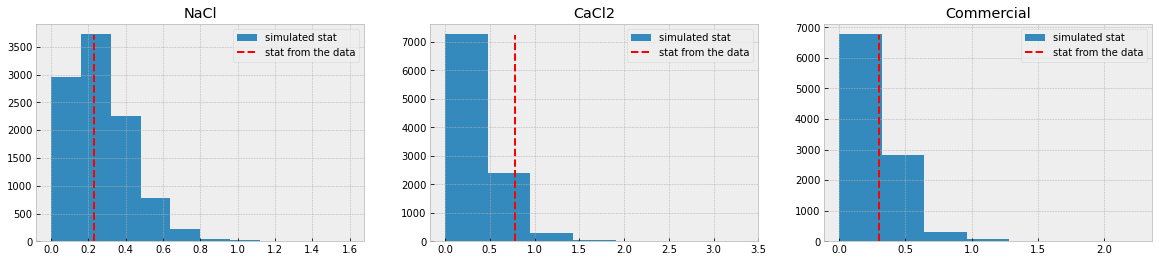

In [52]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(T_st_nacl, label="simulated stat")
ax[0].axvline(x=(Ns_NaCl==1).sum()/ (Ns_NaCl==0).sum(), ls='--', color='r', ymax=.95, label="stat from the data")
ax[0].legend()
ax[0].set_title("NaCl")
#############################################
ax[1].hist(T_st_cacl2, bins=7, label="simulated stat")
ax[1].axvline(x=(Ns_CaCl2==1).sum()/ (Ns_CaCl2==0).sum(), ls='--', color='r', ymax=.95, label="stat from the data")
ax[1].set_title("CaCl2")
ax[1].legend()
################################################
ax[2].hist(T_st_comm, bins=7, label="simulated stat")
ax[2].axvline(x=(Ns_Comm==1).sum()/ (Ns_Comm==0).sum(), ls='--', color='r', ymax=.95, label="stat from the data")
ax[2].legend()
ax[2].set_title("Commercial")
plt.show()
#_.savefig('stat_test.png', bbox_inches = 'tight')

#### The posterior diferences for e

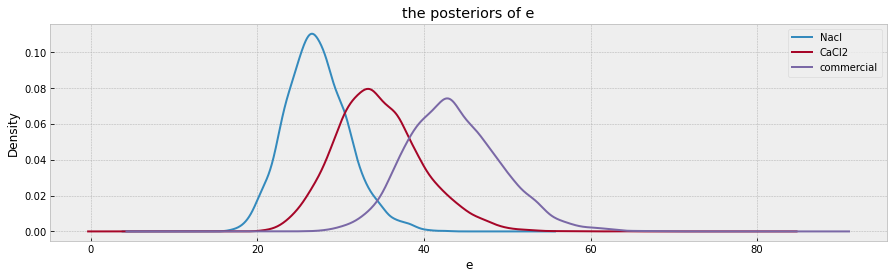

In [53]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
posterior.e_nacl.plot.kde(ax=ax, label="Nacl")
posterior.e_cacl2.plot.kde(ax=ax, label="CaCl2")
posterior.e_comme.plot.kde(ax=ax, label="commercial")
ax.set_xlabel("e")
ax.set_title("the posteriors of e")
ax.legend()
plt.show()
#_.savefig('posteriors_comp.png', bbox_inches = 'tight')

### The differences

In [54]:
diff_e_nacl_comm = posterior.e_nacl.values - posterior.e_comme.values
diff_e_cacl2_comm = posterior.e_cacl2.values - posterior.e_comme.values
diff_e_nacl_cacl2 = posterior.e_nacl.values - posterior.e_cacl2.values

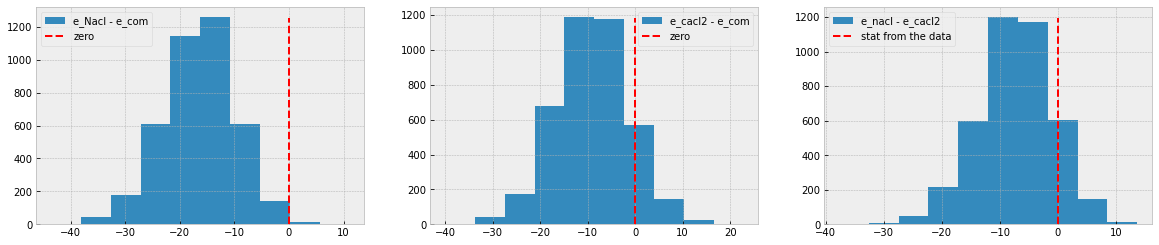

In [55]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(diff_e_nacl_comm, bins=10, label="e_Nacl - e_com")
ax[0].axvline(x=0, ls='--', color='r', ymax=.95, label = "zero")
ax[0].legend()
# ax[0].set_title("")
#############################################
ax[1].hist(diff_e_cacl2_comm, bins=10, label="e_cacl2 - e_com")
ax[1].axvline(x=0, ls='--', color='r', ymax=.95, label = "zero")
# ax[1].set_title()
ax[1].legend()
################################################
ax[2].hist(diff_e_nacl_cacl2, bins=10, label="e_nacl - e_cacl2")
ax[2].axvline(x=0, ls='--', color='r', ymax=.95, label = "stat from the data")
ax[2].legend()
# ax[2].set_title()
plt.show()
#_.savefig('diff_stat.png', bbox_inches = 'tight')

In [56]:
(diff_e_nacl_comm>0).mean()

0.00425

In [57]:
(diff_e_cacl2_comm>0).mean()

0.115

In [58]:
(diff_e_nacl_cacl2>0).mean()

0.11625